In [251]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols #For n-way ANOVA
from statsmodels.stats.anova import _get_covariance, anova_lm #for n-way ANOVA
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [163]:
data_mobile = pd.read_excel("Mobile_SM_Tourism.xlsx")

data_mobile.head().T

,0,1,2,3,4
UserID,1000001,1000002,1000003,1000004,1000005
Taken_product,Yes,No,Yes,No,No
Yearly_avg_view_on_travel_page,307.0,367.0,277.0,247.0,202.0
preferred_device,iOS and Android,iOS,iOS and Android,iOS,iOS and Android
total_likes_on_outstation_checkin_given,38570.0,9765.0,48055.0,48720.0,20685.0
yearly_avg_Outstation_checkins,1,1,1,1,1
member_in_family,2,1,2,4,1
preferred_location_type,Financial,Financial,Other,Financial,Medical
Yearly_avg_comment_on_travel_page,94.0,61.0,92.0,56.0,40.0
total_likes_on_outofstation_checkin_received,5993,5130,2090,2909,3468


In [164]:
data_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        10652 non-null  int64  
 1   Taken_product                                 10652 non-null  object 
 2   Yearly_avg_view_on_travel_page                10071 non-null  float64
 3   preferred_device                              10599 non-null  object 
 4   total_likes_on_outstation_checkin_given       10271 non-null  float64
 5   yearly_avg_Outstation_checkins                10577 non-null  object 
 6   member_in_family                              10652 non-null  object 
 7   preferred_location_type                       10621 non-null  object 
 8   Yearly_avg_comment_on_travel_page             10446 non-null  float64
 9   total_likes_on_outofstation_checkin_received  10652 non-null 

In [165]:
data_mobile.shape

(10652, 17)

In [166]:
data_mobile.columns

Index(['UserID', 'Taken_product', 'Yearly_avg_view_on_travel_page',
       'preferred_device', 'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

In [167]:
dups = data_mobile.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [168]:
df_mobile = data_mobile.drop('UserID',axis=1)

In [169]:
df_mobile.head().T

,0,1,2,3,4
Taken_product,Yes,No,Yes,No,No
Yearly_avg_view_on_travel_page,307.0,367.0,277.0,247.0,202.0
preferred_device,iOS and Android,iOS,iOS and Android,iOS,iOS and Android
total_likes_on_outstation_checkin_given,38570.0,9765.0,48055.0,48720.0,20685.0
yearly_avg_Outstation_checkins,1,1,1,1,1
member_in_family,2,1,2,4,1
preferred_location_type,Financial,Financial,Other,Financial,Medical
Yearly_avg_comment_on_travel_page,94.0,61.0,92.0,56.0,40.0
total_likes_on_outofstation_checkin_received,5993,5130,2090,2909,3468
week_since_last_outstation_checkin,8,1,6,1,9


In [170]:
df_mobile.describe().T

,count,mean,std,min,25%,50%,75%,max
Yearly_avg_view_on_travel_page,10071.0,280.687817,68.604222,35.0,231.00,271.0,324.00,464.0
total_likes_on_outstation_checkin_given,10271.0,28213.720572,14491.041876,3570.0,16285.00,28210.0,40670.00,252430.0
Yearly_avg_comment_on_travel_page,10446.0,74.502968,24.305226,3.0,57.00,74.0,92.00,815.0
total_likes_on_outofstation_checkin_received,10652.0,6563.464232,4739.701522,1009.0,2945.75,4967.5,8394.25,20065.0
week_since_last_outstation_checkin,10652.0,3.224934,2.628021,0.0,1.00,3.0,5.00,11.0
montly_avg_comment_on_company_page,10652.0,28.896921,51.084242,11.0,17.00,22.0,27.00,500.0
travelling_network_rating,10652.0,2.705595,1.080931,1.0,2.00,3.0,4.00,4.0
Adult_flag,10652.0,0.796846,0.854243,0.0,0.00,1.0,1.00,3.0
Daily_Avg_mins_spend_on_traveling_page,10652.0,13.837401,9.159876,0.0,8.00,12.0,18.00,270.0


In [171]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 10652 non-null  object 
 1   Yearly_avg_view_on_travel_page                10071 non-null  float64
 2   preferred_device                              10599 non-null  object 
 3   total_likes_on_outstation_checkin_given       10271 non-null  float64
 4   yearly_avg_Outstation_checkins                10577 non-null  object 
 5   member_in_family                              10652 non-null  object 
 6   preferred_location_type                       10621 non-null  object 
 7   Yearly_avg_comment_on_travel_page             10446 non-null  float64
 8   total_likes_on_outofstation_checkin_received  10652 non-null  int64  
 9   week_since_last_outstation_checkin            10652 non-null 

In [172]:
df_mobile.isnull().sum()

Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

Displaying unique values

In [173]:
for i in df_mobile.columns:
    if df_mobile[i].dtype == 'object':
        print(i)
        print(df_mobile[i].unique())
        print("\n")

Taken_product
['Yes' 'No']


preferred_device
['iOS and Android' 'iOS' 'ANDROID' nan 'Android' 'Android OS' 'Other'
 'Others' 'Tab' 'Mobile']


yearly_avg_Outstation_checkins
[1 24 23 27 16 15 26 19 21 11 10 25 12 18 29 nan 22 14 20 28 17 13 '*' 5 2
 3 9 7 6 8 4]


member_in_family
[2 1 4 'Three' 3 5 10]


preferred_location_type
['Financial' 'Other' 'Medical' nan 'Game' 'Social media' 'Entertainment'
 'Tour and Travel' 'Movie' 'OTT' 'Tour  Travel' 'Beach' 'Historical site'
 'Big Cities' 'Trekking' 'Hill Stations']


following_company_page
['Yes' 'No' nan 1 0]


working_flag
['No' 'Yes']




Cleaning the dataset

In [174]:
#There seems to be certain garbage values in the dataset. Lets set that right by replacing them with null values

df_mobile['yearly_avg_Outstation_checkins'] = df_mobile['yearly_avg_Outstation_checkins'].replace('*',np.nan)

In [175]:
#As the garbage value is nothing but the value 3 is written in the text format

df_mobile['member_in_family'] = df_mobile['member_in_family'].replace('Three',3)

In [176]:
#Changing 'Yes' into 1 and 'No' to 0

df_mobile['following_company_page'] = df_mobile['following_company_page'].replace('Yes','1')
df_mobile['following_company_page'] = df_mobile['following_company_page'].replace('No','0')

In [177]:
df_mobile['Taken_product'] = df_mobile['Taken_product'].replace('Yes','1')
df_mobile['Taken_product'] = df_mobile['Taken_product'].replace('No','0')

df_mobile['working_flag'] = df_mobile['working_flag'].replace('Yes','1')
df_mobile['working_flag'] = df_mobile['working_flag'].replace('No','0')

df_mobile['following_company_page'] = df_mobile['following_company_page'].replace(1,'1')
df_mobile['following_company_page'] = df_mobile['following_company_page'].replace(0,'0')

In [178]:
df_mobile['preferred_location_type'] = df_mobile['preferred_location_type'].replace('Tour  Travel','Tour and Travel')
df_mobile['preferred_location_type'] = df_mobile['preferred_location_type'].replace('Game','Entertainment')
df_mobile['preferred_location_type'] = df_mobile['preferred_location_type'].replace('Movie','Entertainment')

In [179]:
for i in df_mobile.columns:
    if df_mobile[i].dtype == 'object':
        print(i)
        print(df_mobile[i].unique()) 
        print()  

Taken_product
['1' '0']

preferred_device
['iOS and Android' 'iOS' 'ANDROID' nan 'Android' 'Android OS' 'Other'
 'Others' 'Tab' 'Mobile']

preferred_location_type
['Financial' 'Other' 'Medical' nan 'Entertainment' 'Social media'
 'Tour and Travel' 'OTT' 'Beach' 'Historical site' 'Big Cities' 'Trekking'
 'Hill Stations']

following_company_page
['1' '0' nan]

working_flag
['0' '1']



In [180]:
df_mobile['Adult_flag'] = df_mobile['Adult_flag'].replace(1,0)
df_mobile['Adult_flag'] = df_mobile['Adult_flag'].replace(2,1)
df_mobile['Adult_flag'] = df_mobile['Adult_flag'].replace(3,1)

In [181]:
df_mobile['Adult_flag'].unique()

array([0, 1], dtype=int64)

In [182]:
df_mobile.columns

Index(['Taken_product', 'Yearly_avg_view_on_travel_page', 'preferred_device',
       'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

Replacing the null values

In [183]:
df_mobile['preferred_location_type'] = df_mobile['preferred_location_type'].replace(np.nan,df_mobile['preferred_location_type'].mode()[0])

In [184]:
df_mobile['preferred_location_type'].unique()

array(['Financial', 'Other', 'Medical', 'Entertainment', 'Social media',
       'Tour and Travel', 'OTT', 'Beach', 'Historical site', 'Big Cities',
       'Trekking', 'Hill Stations'], dtype=object)

In [185]:
df_mobile['yearly_avg_Outstation_checkins'] = df_mobile['yearly_avg_Outstation_checkins'].replace(np.nan,df_mobile['yearly_avg_Outstation_checkins'].mode()[0])

In [186]:
df_mobile['yearly_avg_Outstation_checkins'].unique()

array([ 1., 24., 23., 27., 16., 15., 26., 19., 21., 11., 10., 25., 12.,
       18., 29., 22., 14., 20., 28., 17., 13.,  5.,  2.,  3.,  9.,  7.,
        6.,  8.,  4.])

In [187]:
df_mobile['following_company_page'] = df_mobile['following_company_page'].replace(np.nan,df_mobile['following_company_page'].mode()[0])

In [188]:
df_mobile['following_company_page'].unique()

array(['1', '0'], dtype=object)

In [189]:
df_mobile['following_company_page'] = df_mobile['following_company_page'].replace(np.nan,df_mobile['following_company_page'].mode()[0])

In [190]:
df_mobile['following_company_page'].unique()

array(['1', '0'], dtype=object)

In [193]:
df_mobile['preferred_device'] = df_mobile['preferred_device'].replace(np.nan,df_mobile['preferred_device'].mode()[0])

In [194]:
df_mobile['preferred_device'].unique()

array(['iOS and Android', 'iOS', 'ANDROID', 'Tab', 'Android',
       'Android OS', 'Other', 'Others', 'Mobile'], dtype=object)

Changing certain columns categorical

In [195]:
df_mobile['Adult_flag'] = pd.Categorical(df_mobile['Adult_flag'])
df_mobile['Taken_product'] = pd.Categorical(df_mobile['Taken_product'])
df_mobile['member_in_family'] = pd.Categorical(df_mobile['member_in_family'])
df_mobile['following_company_page'] = pd.Categorical(df_mobile['following_company_page'])
df_mobile['working_flag'] = pd.Categorical(df_mobile['working_flag'])
df_mobile['travelling_network_rating'] = pd.Categorical(df_mobile['travelling_network_rating'])

In [232]:
#Changing certain columns into int

df_mobile['yearly_avg_Outstation_checkins'] = df_mobile['yearly_avg_Outstation_checkins'].astype(int)

In [233]:
df_mobile['yearly_avg_Outstation_checkins'].dtype

dtype('int32')

Checking null values for numerical columns

In [234]:
df_mobile.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [235]:
df_mobile['Yearly_avg_view_on_travel_page'] = df_mobile['Yearly_avg_view_on_travel_page'].replace(np.nan,df_mobile['Yearly_avg_view_on_travel_page'].median())
df_mobile['total_likes_on_outstation_checkin_given'] = df_mobile['total_likes_on_outstation_checkin_given'].replace(np.nan,df_mobile['total_likes_on_outstation_checkin_given'].median())
df_mobile['Yearly_avg_comment_on_travel_page'] = df_mobile['Yearly_avg_comment_on_travel_page'].replace(np.nan,df_mobile['Yearly_avg_comment_on_travel_page'].median())

In [236]:
df_mobile.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [241]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Taken_product                                 10652 non-null  category
 1   Yearly_avg_view_on_travel_page                10652 non-null  float64 
 2   preferred_device                              10652 non-null  object  
 3   total_likes_on_outstation_checkin_given       10652 non-null  float64 
 4   yearly_avg_Outstation_checkins                10652 non-null  int32   
 5   member_in_family                              10652 non-null  category
 6   preferred_location_type                       10652 non-null  object  
 7   Yearly_avg_comment_on_travel_page             10652 non-null  float64 
 8   total_likes_on_outofstation_checkin_received  10652 non-null  int64   
 9   week_since_last_outstation_checkin            1065

In [242]:
#Grouping numeric features in one frame : df_mobile_num
df_mobile_num = df_mobile.select_dtypes(include = ['float64', 'int64','int32'])
lstnumericcolumns = list(df_mobile_num.columns.values)
print('Number of numeric features : ',len(lstnumericcolumns))

#Grouping categorical features in one frame : df_mobile_cat
df_mobile_cat = df_mobile.select_dtypes(include=['object','category'])
lstcategoricalcolumns = list(df_mobile_cat.columns.values)
print('Number of categorical features : ',len(lstcategoricalcolumns))

Number of numeric features :  8
Number of categorical features :  8


In [243]:
df_mobile_num.columns

Index(['Yearly_avg_view_on_travel_page',
       'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin',
       'montly_avg_comment_on_company_page',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

In [244]:
df_mobile_cat.columns

Index(['Taken_product', 'preferred_device', 'member_in_family',
       'preferred_location_type', 'following_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag'],
      dtype='object')

Univariate Analysis

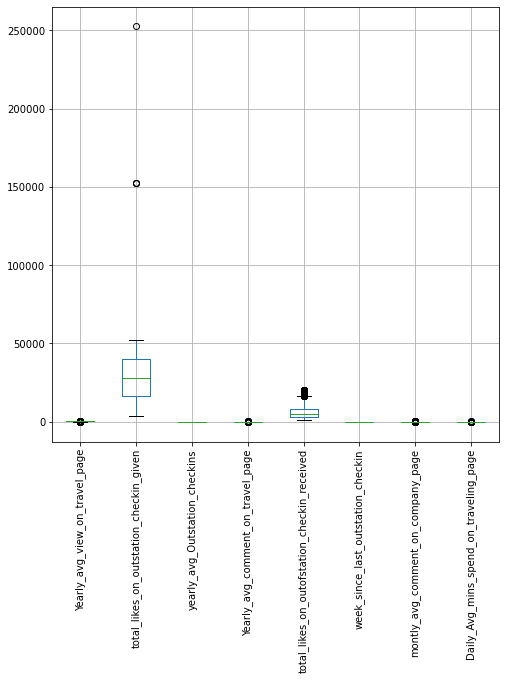

In [246]:
#Univariate Analysis : Boxplot

df_mobile_num.boxplot(figsize=(8,8))
plt.xticks(rotation=90)
plt.show()

In [247]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [248]:
for column in df_mobile_num.columns:
    lr,ur=remove_outlier(df_mobile_num[column])
    df_mobile_num[column]=np.where(df_mobile_num[column]>ur,ur,df_mobile_num[column])
    df_mobile_num[column]=np.where(df_mobile_num[column]<lr,lr,df_mobile_num[column])

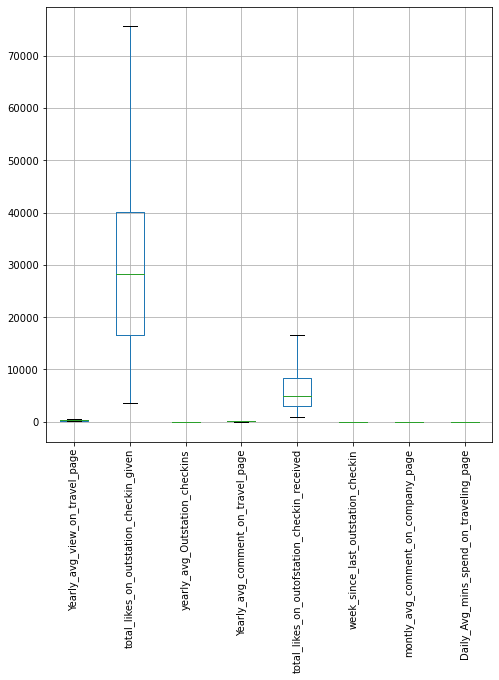

In [249]:
df_mobile_num.boxplot(figsize=(8,8))
plt.xticks(rotation=90)
plt.show()

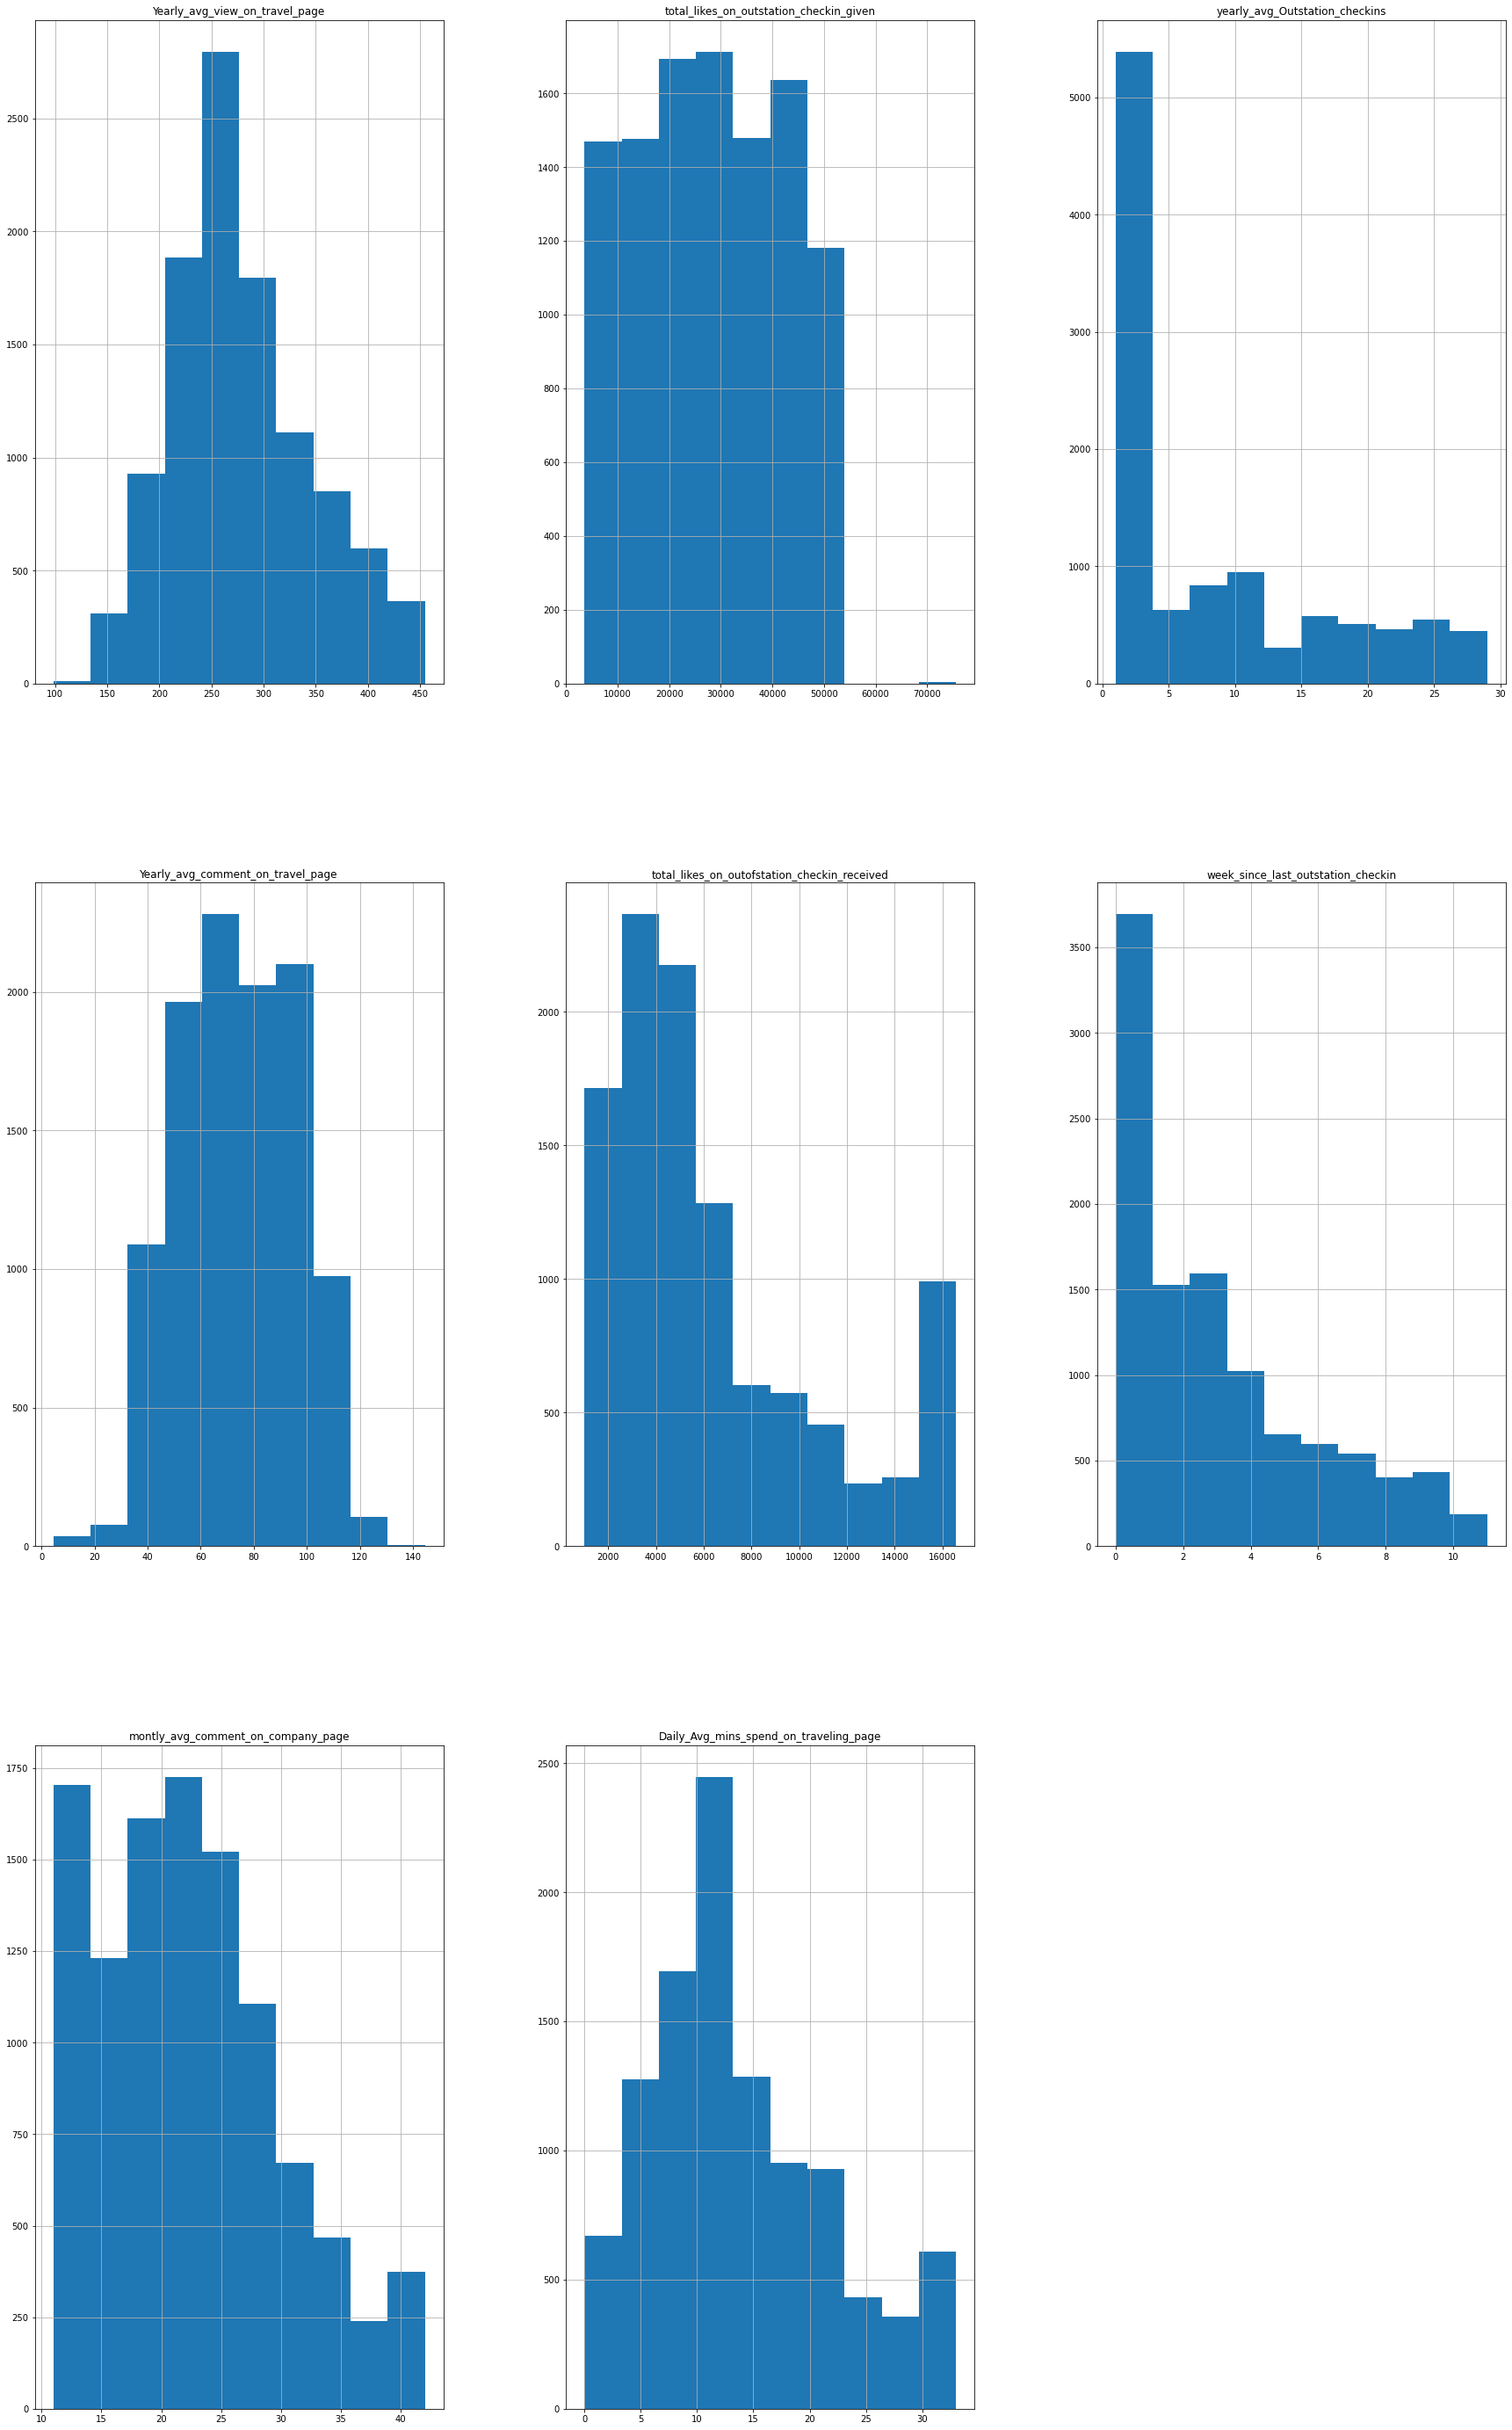

In [250]:
df_mobile_num.hist(column = df_mobile_num.columns, figsize=(30,50));

In [253]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df_mobile_num.Yearly_avg_view_on_travel_page),stats.skew(df_mobile_num.total_likes_on_outstation_checkin_given),
                                       stats.skew(df_mobile_num.yearly_avg_Outstation_checkins),stats.skew(df_mobile_num.Yearly_avg_comment_on_travel_page),
                                       stats.skew(df_mobile_num.total_likes_on_outofstation_checkin_received),stats.skew(df_mobile_num.week_since_last_outstation_checkin),
                                       stats.skew(df_mobile_num.montly_avg_comment_on_company_page),
                                      stats.skew(df_mobile_num.Daily_Avg_mins_spend_on_traveling_page)]},
                        index=['Yearly_avg_view_on_travel_page', 'total_likes_on_outstation_checkin_given', 
                               'yearly_avg_Outstation_checkins', 'Yearly_avg_comment_on_travel_page', 
                               'total_likes_on_outofstation_checkin_received', 'week_since_last_outstation_checkin',
                               'montly_avg_comment_on_company_page','Daily_Avg_mins_spend_on_traveling_page'])  

Skewness

,Skewness
Yearly_avg_view_on_travel_page,0.468292
total_likes_on_outstation_checkin_given,-0.002875
yearly_avg_Outstation_checkins,0.989296
Yearly_avg_comment_on_travel_page,-0.080812
total_likes_on_outofstation_checkin_received,1.157249
week_since_last_outstation_checkin,0.903392
montly_avg_comment_on_company_page,0.566971
Daily_Avg_mins_spend_on_traveling_page,0.718705


Categorical Variables

In [255]:
df_mobile_cat.columns

Index(['Taken_product', 'preferred_device', 'member_in_family',
       'preferred_location_type', 'following_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag'],
      dtype='object')

<AxesSubplot:xlabel='travelling_network_rating', ylabel='count'>

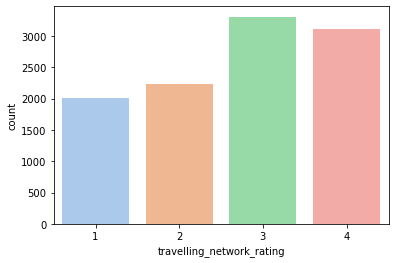

In [254]:
sns.countplot(x='travelling_network_rating', data=df_mobile_cat, palette='pastel')

<AxesSubplot:xlabel='Taken_product', ylabel='count'>

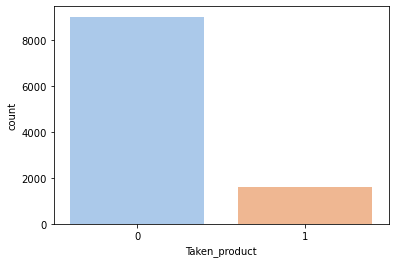

In [256]:
sns.countplot(x='Taken_product', data=df_mobile_cat, palette='pastel')

<AxesSubplot:xlabel='preferred_device', ylabel='count'>

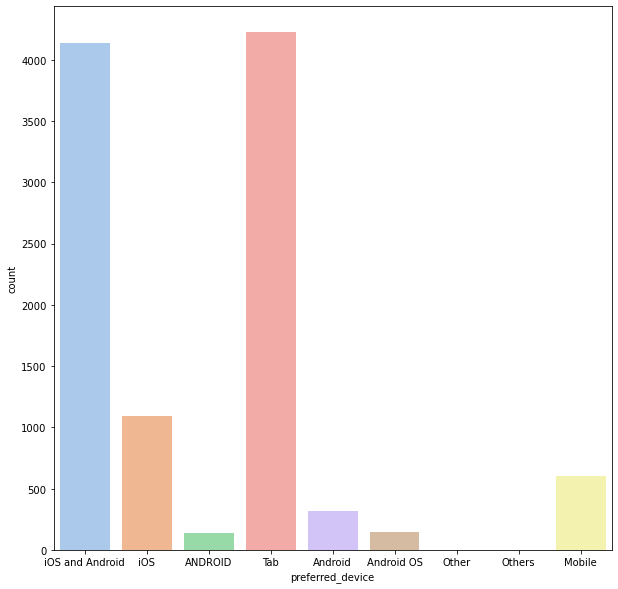

In [266]:
plt.figure(figsize = (10,10))
sns.countplot(x='preferred_device', data=df_mobile_cat, palette='pastel')

<AxesSubplot:xlabel='member_in_family', ylabel='count'>

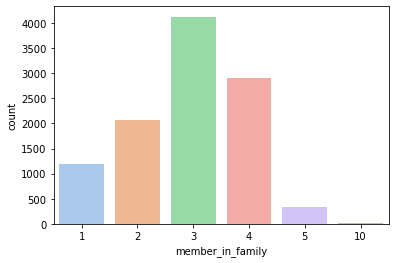

In [258]:
sns.countplot(x='member_in_family', data=df_mobile_cat, palette='pastel')

<AxesSubplot:xlabel='preferred_location_type', ylabel='count'>

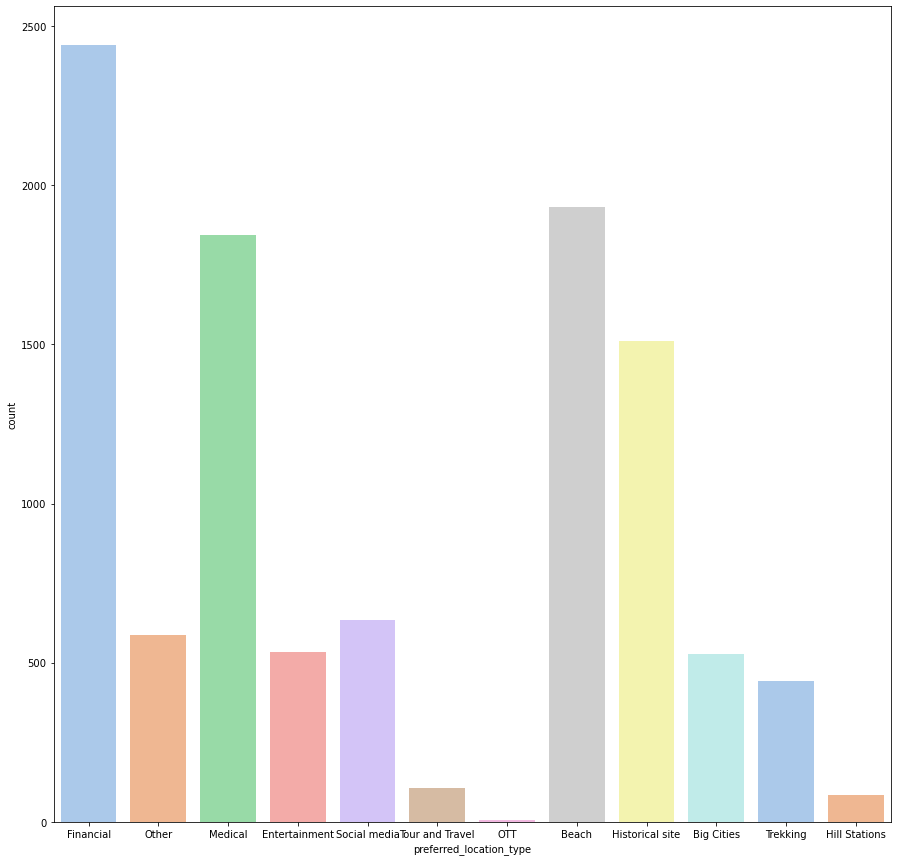

In [270]:
plt.figure(figsize = (15,15))
sns.countplot(x='preferred_location_type', data=df_mobile_cat, palette='pastel')

<AxesSubplot:xlabel='following_company_page', ylabel='count'>

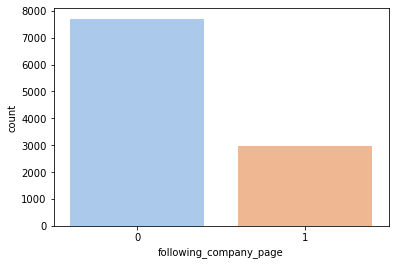

In [271]:
sns.countplot(x='following_company_page', data=df_mobile_cat, palette='pastel')

<AxesSubplot:xlabel='working_flag', ylabel='count'>

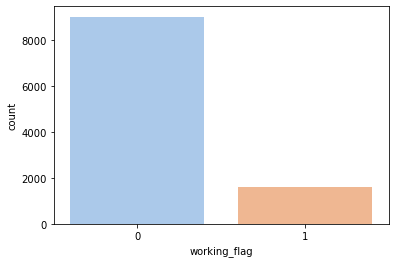

In [272]:
sns.countplot(x='working_flag', data=df_mobile_cat, palette='pastel')

<AxesSubplot:xlabel='Adult_flag', ylabel='count'>

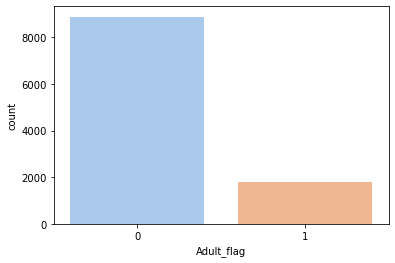

In [273]:
sns.countplot(x='Adult_flag', data=df_mobile_cat, palette='pastel')

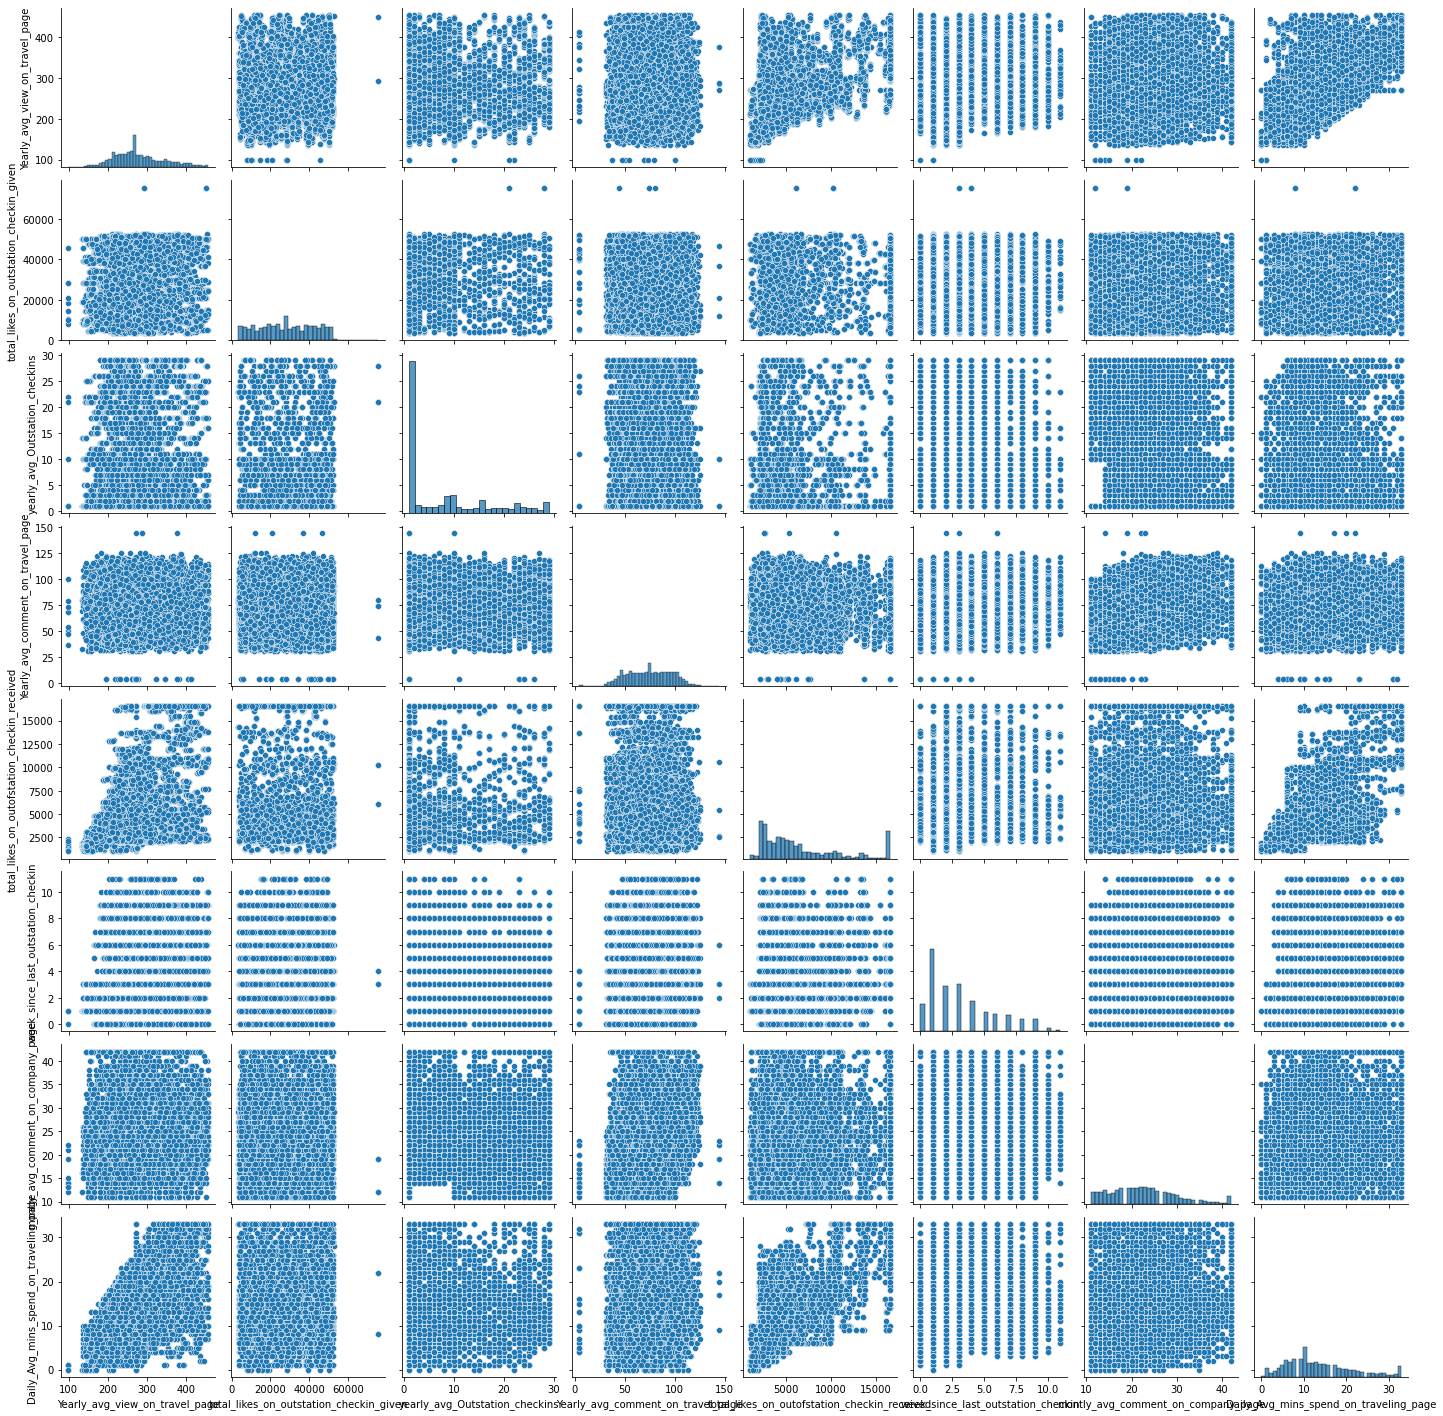

In [277]:
sns.pairplot(df_mobile_num)
plt.show()

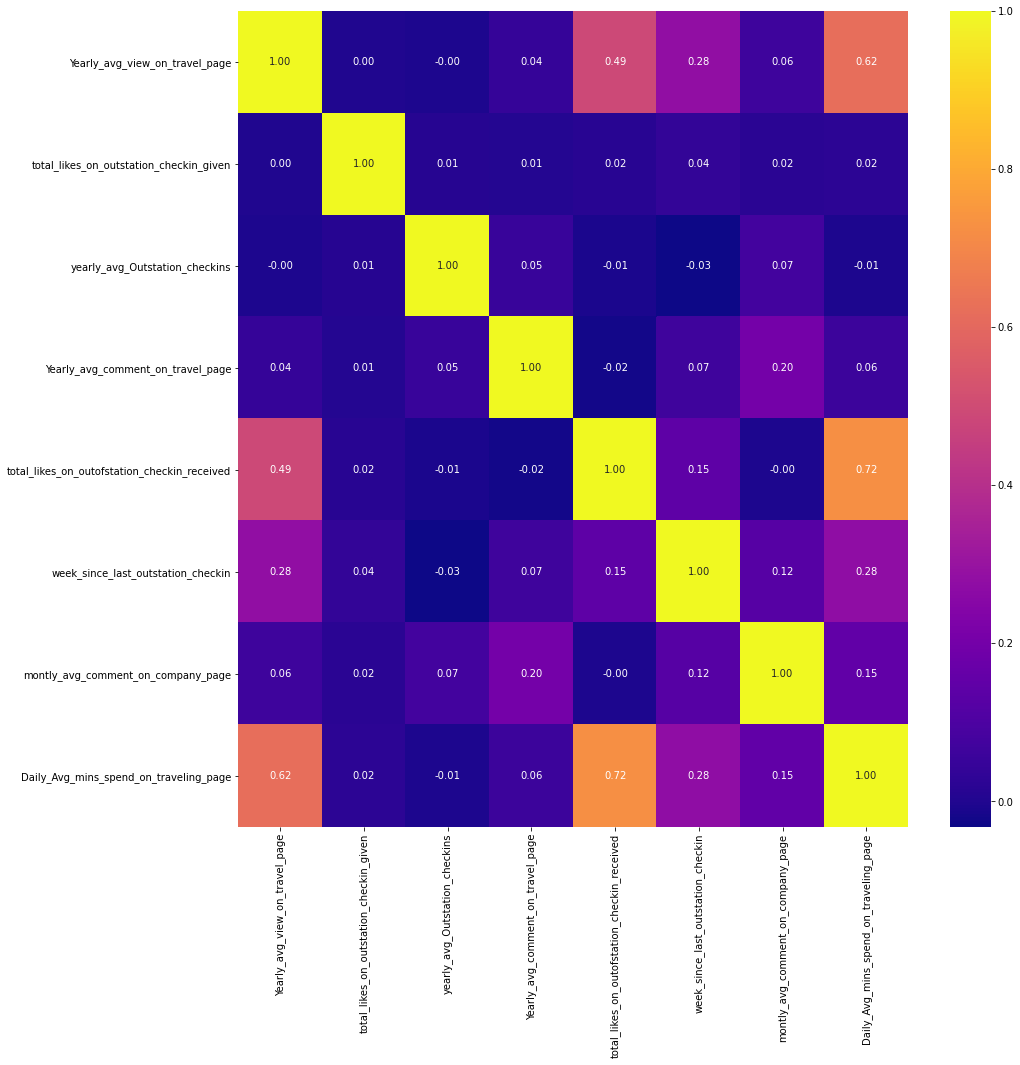

In [280]:
plt.figure(figsize=(15,15))
sns.heatmap(df_mobile_num.corr(),annot=True,fmt=".2f", cmap='plasma');